# Visualisation using

![Matplotlib](http://upload.wikimedia.org/wikipedia/en/5/56/Matplotlib_logo.svg)

# Table of Contents

1. [Notebook Setup](#setup)
2. [Simple Line Plots](#line_plots)
    * [Using different styles for plots](#different_styles)
    * [Setting x and y limits](#setting_limits)
    * [Labeling plots](#plot_labels)
        - [Label formatting](#label_format)
        - [LaTeX labels](#latex_labels)
    * [Legends](#legends)
    * [Grids](#grids)
    * [Axis scales](#axis_scales)
    * [Ticks](#ticks)
    * [Multiple lines in the same plot](#multiple_lines)
    * [Multiple plots in the same figure](#multiple_plots)
        - [Shared axes](#shared_axes)
        - [Tight layout](#tight_layout)
        - [Inset plots](#inset_plots)
3. [Error bars](#error_bars)
    * [Asymmetrical errors](#asym_errors)
    * [Upper and lower limits](#upper_limits)
4. [Polar plots](#polar_plots)
5. [Histograms](#histograms)
    * [1D Histograms](#hist1d)
    * [2D Histograms](#hist2d)
6. [Scatter Plots](#scatter)
7. [Plots for Publication](#publication_plots)
    * [Plot styles](#plot_styles)
    * [Saving figures](#save_figures)

<a id=setup></a>
# Notebook Setup (run me first!)

First, we apply a "magic command" to make plots appear "inline" inside the notebook. Alternatively, we could allow plots to appear in a separate window.

In [1]:
# only for the notebook
%matplotlib inline
# only in the ipython shell
# %matplotlib

In order to work with Matplotlib, the library must be imported first. So we do not have to type so much, we give it a shorter name:

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

Matplotlib works best with numpy arrays, so we import `numpy` as well

In [4]:
import numpy as np

<a id=line_plots></a>
# Simple Line Plots

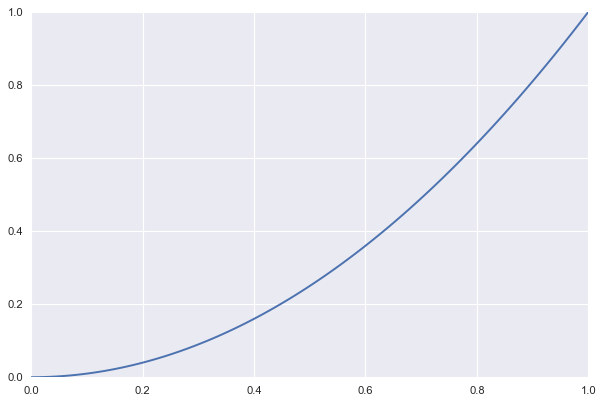

In [191]:
x = np.linspace(0, 1, 100) # 100 numbers from 0 to 1

plt.plot(x, x**2);
# If not interactive, e.g. in a script: 
# plt.show()

<a id=different_styles></a>
## Using different styles for plots

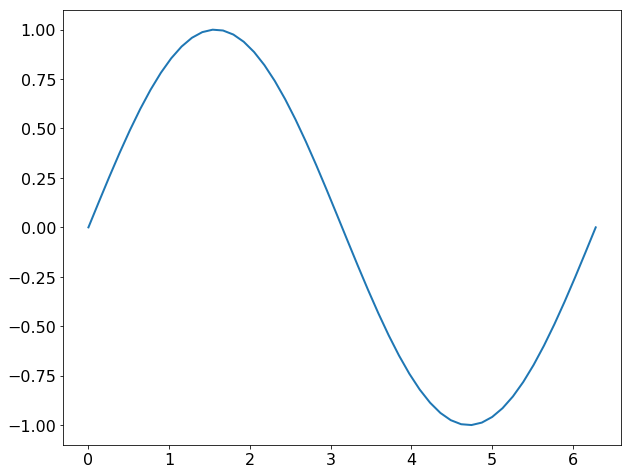

In [84]:
t = np.linspace(0, 2*np.pi)   # 50 points between 0 and 2π
plt.plot(t, np.sin(t));

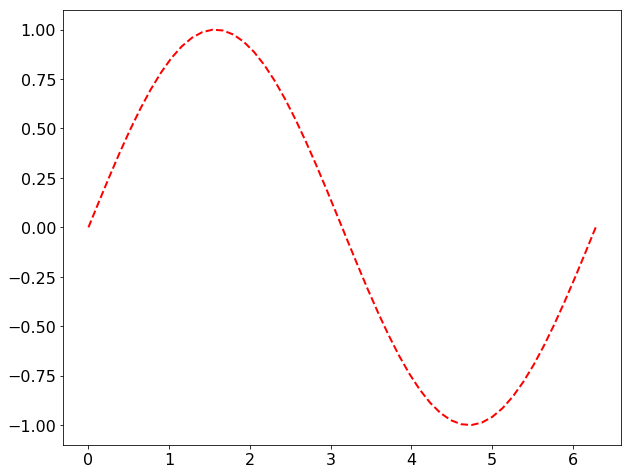

In [85]:
plt.plot(t, np.sin(t), 'r--');

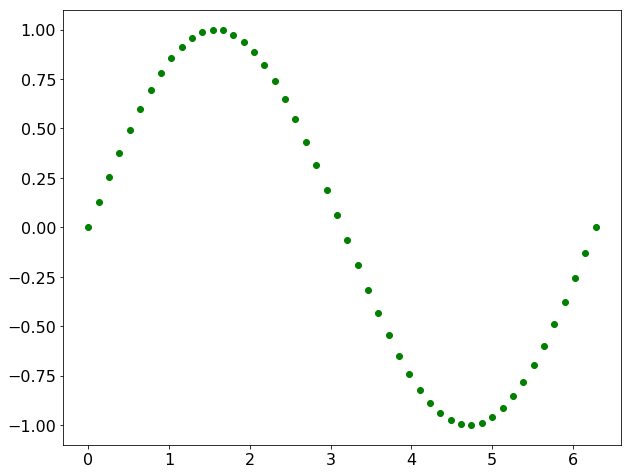

In [86]:
plt.plot(t, np.sin(t), 'go');
# plt.plot(t, np.sin(t), color='green', marker='o', linewidth=False);   # same thing!

All styles and colors: [matplotlib.axes.Axes.plot](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)



<a id=setting_limits></a>
### Setting x and y limits

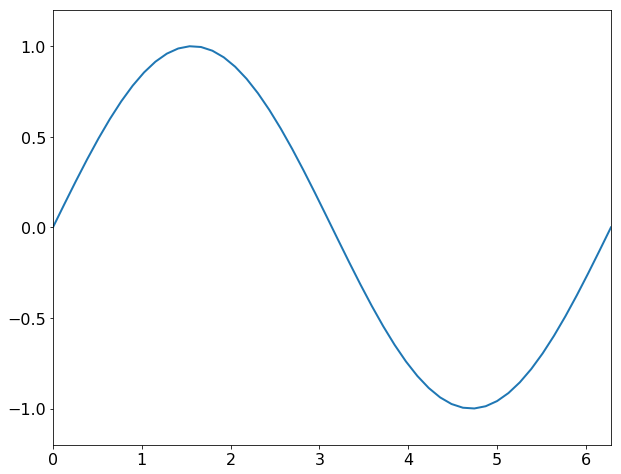

In [87]:
plt.plot(t, np.sin(t))
plt.xlim(0, 2*np.pi)
plt.ylim(-1.2, 1.2);

<a id=plot_labels></a>
## We are still lacking something important
![XKCD comic on why you should label your axes.](http://imgs.xkcd.com/comics/convincing.png "And if you labeled your axes, I could tell you exactly how MUCH better.")

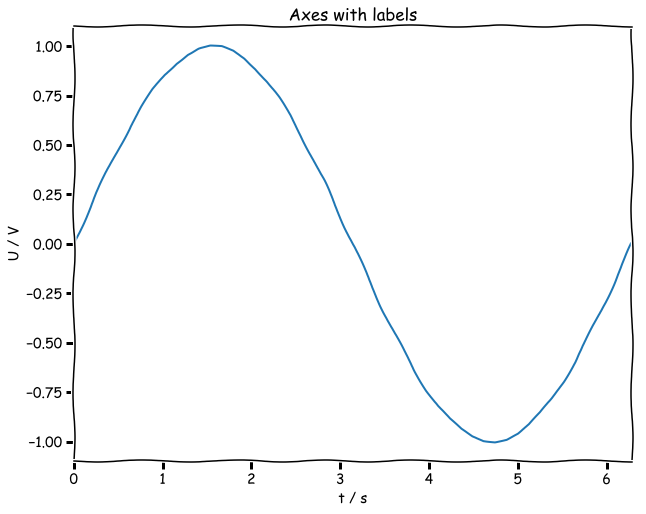

In [88]:
with plt.xkcd():
    plt.title('Axes with labels')
    plt.plot(t, np.sin(t))
    plt.xlabel('t / s')
    plt.ylabel('U / V')
    plt.ylim(-1.1, 1.1)
    plt.xlim(0, 2*np.pi)

<a id=label_formatting></a>
### Label formatting

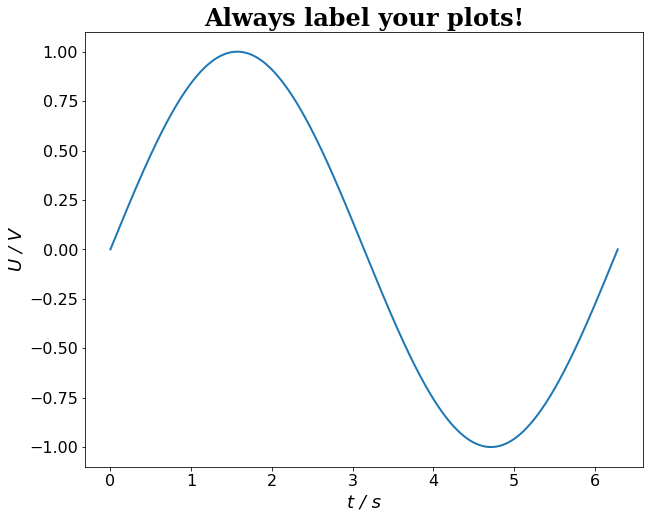

In [68]:
plt.plot(t, np.sin(t))

title_font = {'fontsize': 24, 'fontweight': 'bold', 'family': 'serif'}
axes_font = {'fontsize': 18, 'fontstyle': 'italic'}

plt.xlabel('t / s', axes_font)
plt.ylabel('U / V', axes_font)
plt.title('Always label your plots!', title_font);

<a id=latex_labels></a>
### Matplotlib can handle a rather complete subset of LaTeX in any text

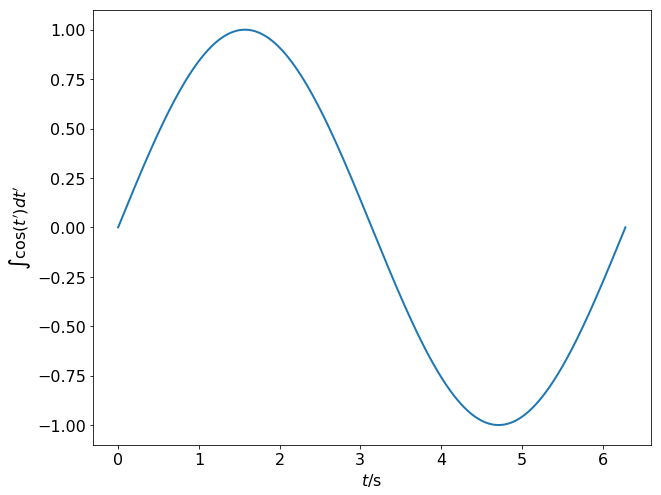

In [69]:
plt.plot(t, np.sin(t))
plt.xlabel(r'$t / \mathrm{s}$')   # leading r means "raw", so that '\' is handled correctly
plt.ylabel(r"$\int \cos(t') dt'$");

<a id=legends></a>
## Legends

Matplotlib can create legends automatically for plot objects that have a label.

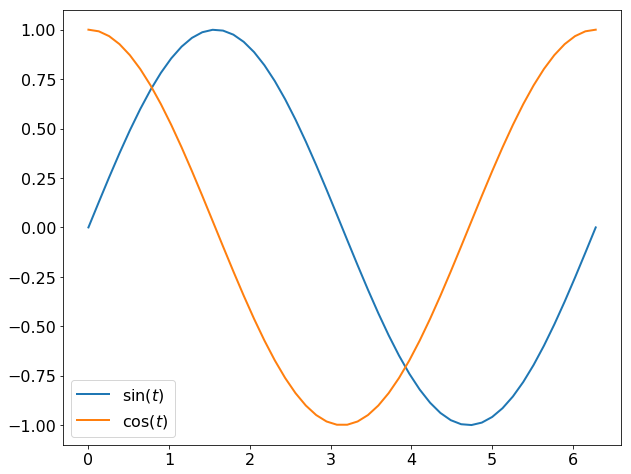

In [89]:
plt.plot(t, np.sin(t), label=r'$\sin(t)$')
plt.plot(t, np.cos(t), label=r'$\cos(t)$')
plt.legend();
#plt.legend(loc='upper center');

<a id=grids></a>
## Grids

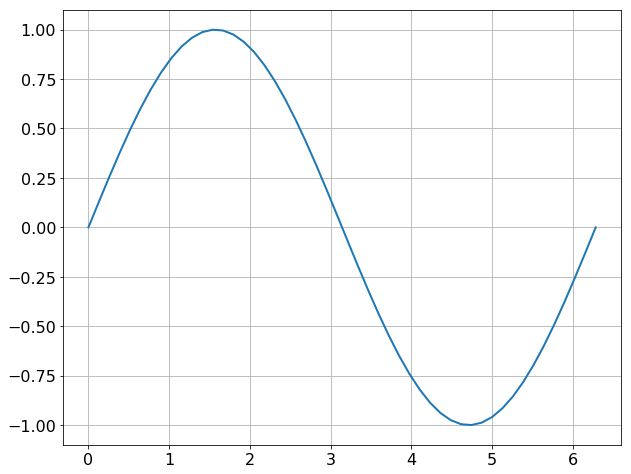

In [48]:
plt.plot(t, np.sin(t))
plt.grid()

<a id=axis_scales></a>
## Axis-Scales

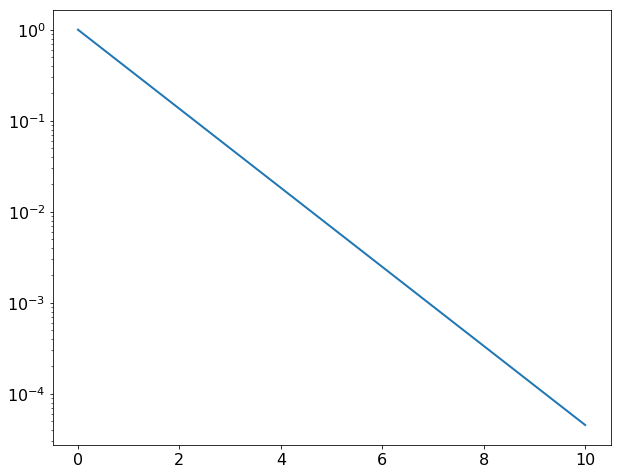

In [49]:
x = np.linspace(0, 10)
# x = np.logspace(-1, 2, 100)

plt.plot(x, np.exp(-x))
plt.yscale('log')
# plt.xscale('log')

<a id=ticks></a>
## Ticks

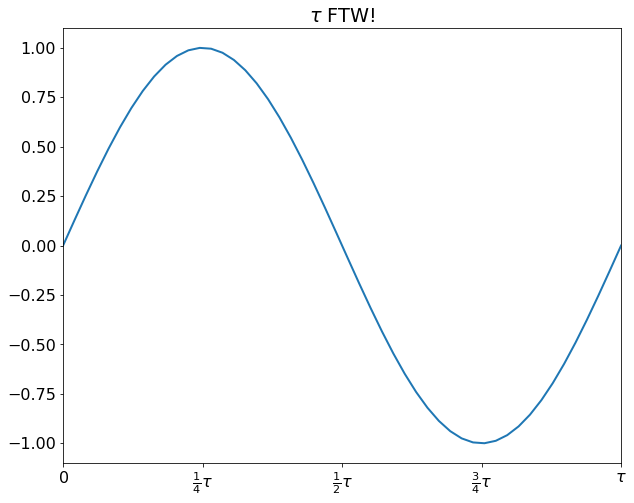

In [71]:
x = np.linspace(0, 2*np.pi)

plt.plot(x, np.sin(x))
plt.xlim(0, 2*np.pi)
# First argument: position, second argument: labels
plt.xticks(
    np.arange(0, 2*np.pi + 0.1, np.pi/2),
    [r"$0$", r"$\frac{1}{4}\tau$", r"$\frac{1}{2}\tau$", r"$\frac{3}{4}\tau$", r"$\tau$"]
)
plt.title(r"$\tau$ FTW!");   # https://tauday.com/tau-manifesto

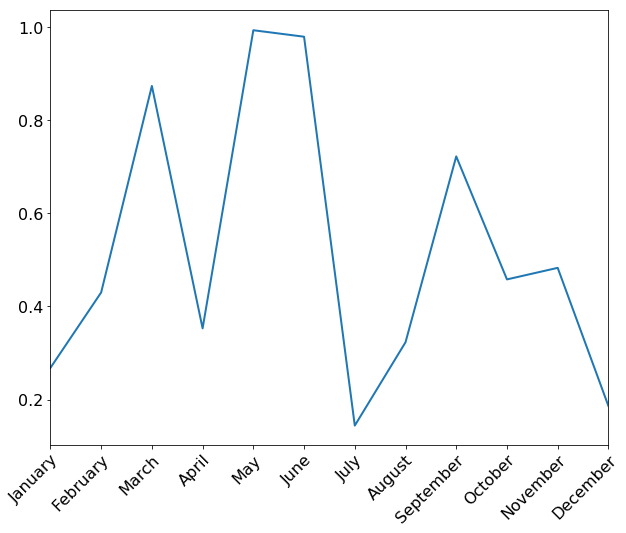

In [72]:
months = ['January',
          'February',
          'March',
          'April',
          'May',
          'June',
          'July',
          'August',
          'September',
          'October',
          'November',
          'December']

plt.plot(np.arange(12), np.random.rand(12))
plt.xticks(np.arange(12), months, rotation=45, rotation_mode='anchor', ha='right', va='top')
plt.xlim(0, 11);

<a id=multiple_lines></a>
## Multiple lines in the same plot

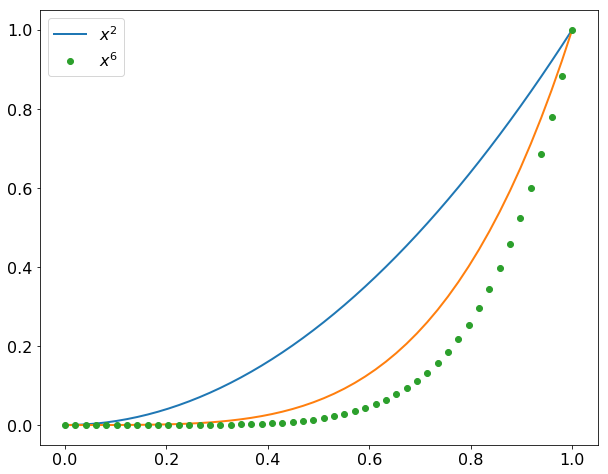

In [73]:
x = np.linspace(0, 1)

plt.plot(x, x**2, label=r'$x^2$')
plt.plot(x, x**4)
plt.plot(x, x**6, 'o', label=r'$x^6$')

plt.legend(loc='best');

**Remember**: Legend entries are only generated for plot objects that have a label (note x⁴ is missing)!

<a id=multiple_plots></a>
## Multiple plots in the same figure

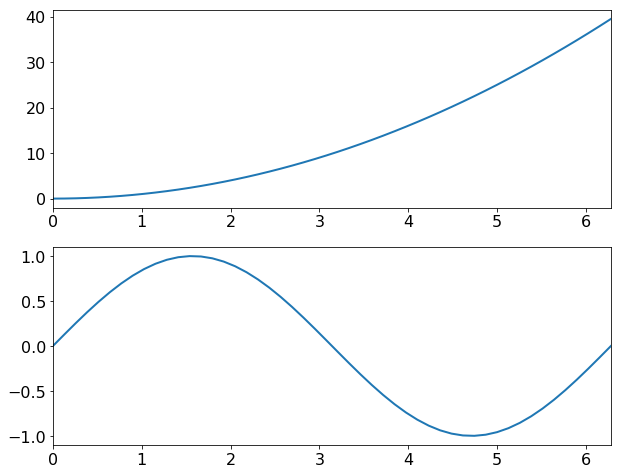

In [74]:
x = np.linspace(0, 2*np.pi)

# subplot arguments: # of rows, # of columns, plot index (row * (#cols) + col)
plt.subplot(2, 1, 1)
plt.plot(x, x**2)
plt.xlim(0, 2*np.pi)

plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))
plt.xlim(0, 2*np.pi)

<a id=shared_axes></a>
### Shared Axes

<a id=tight_layout></a>
### You should almost always call `plt.tight_layout()`

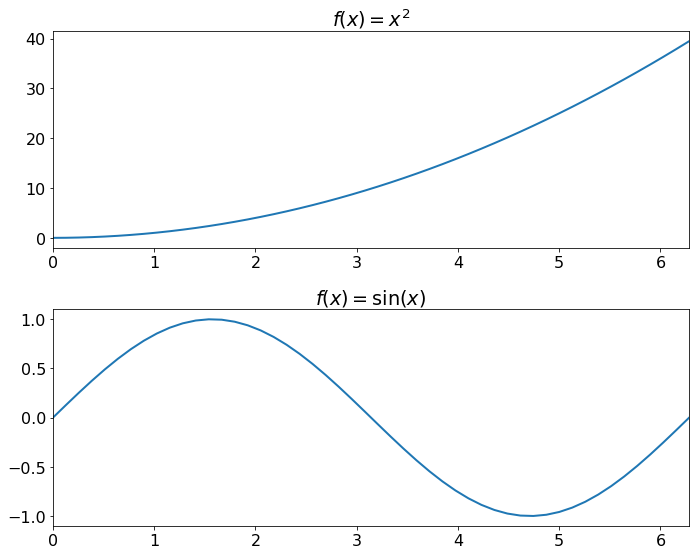

In [54]:
x = np.linspace(0, 2*np.pi)

plt.subplot(2, 1, 1)
plt.plot(x, x**2)
plt.xlim(0, 2*np.pi)
plt.title(r"$f(x)=x^2$")

plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))
plt.xlim(0, 2*np.pi)
plt.title(r"$f(x)=\sin(x)$")

plt.tight_layout()   # try commenting this line out!

<a id=inset_plots></a>
### Inset Plots (plot inside a plot)

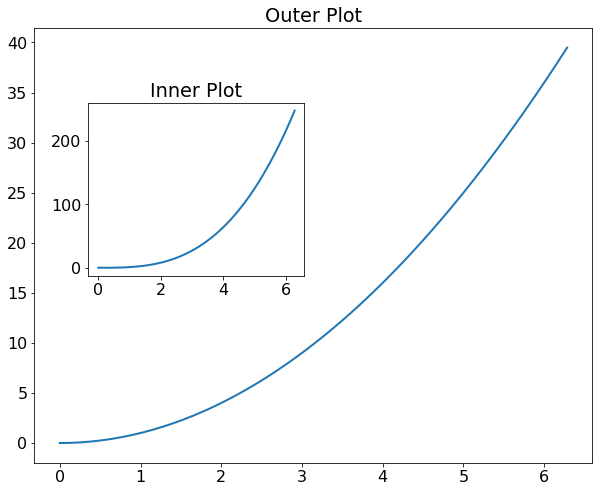

In [75]:
plt.plot(x, x**2)
plt.title("Outer Plot")

# axes coordinates: (0,0) is lower left, (1,1) upper right
plt.axes([0.2, 0.45, 0.3, 0.3])
plt.plot(x, x**3)
plt.title("Inner Plot");

<a id=error_bars></a>
# Error bars

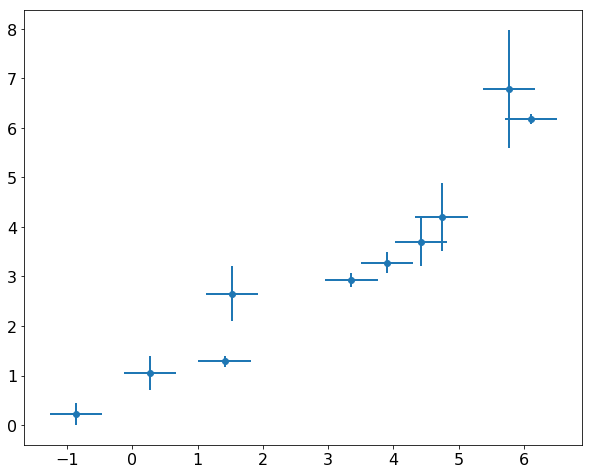

In [76]:
x = np.linspace(0, 2*np.pi, 10)
errX = np.random.normal(0, 0.4, 10)
errY = np.random.normal(0, 0.4, 10)

plt.errorbar(x + errX, x + errY, xerr=0.4, yerr=errY, fmt='o');

<a id=asym_errors></a>
## Asymmetrical errors

<a id=upper_limits></a>
## Upper and lower limits

<a id=polar_plots></a>
# Polar Plots

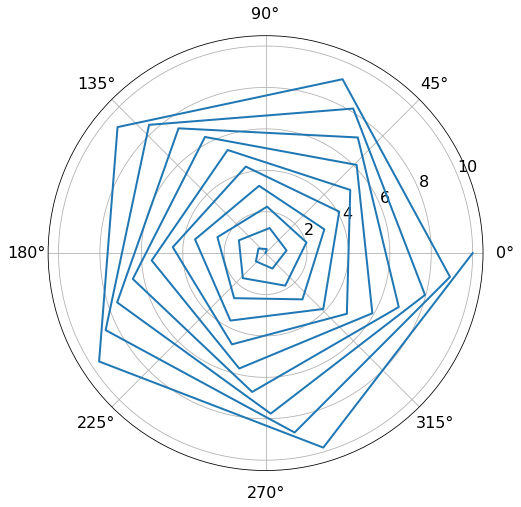

In [77]:
r = np.linspace(0, 10, 50)
# r = np.linspace(0, 10, 1000)
theta = 2*np.pi*r

plt.polar(theta, r);

<a id=histograms></a>
# Histograms

<a id=hist1d></a>
## 1D Histograms

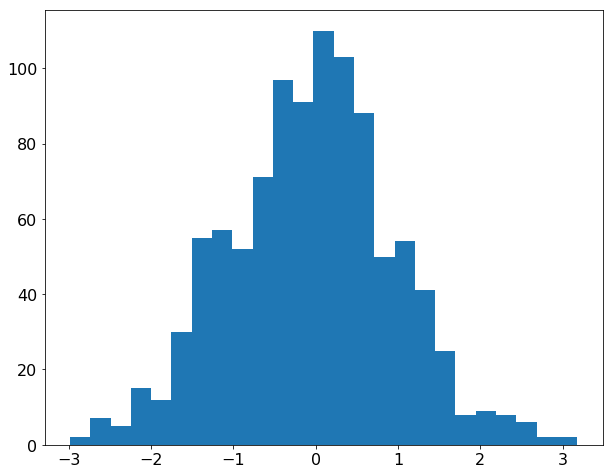

In [90]:
# Generate random data:
x = np.random.normal(0, 1, 1000)
plt.hist(x, bins=25);

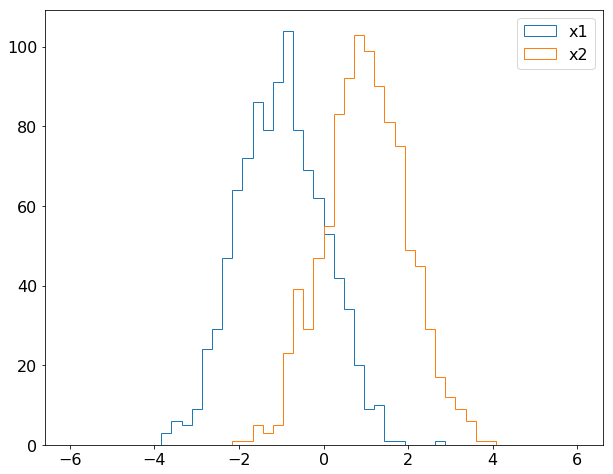

In [91]:
x1 = np.random.normal(-1, 1, 1000)
x2 = np.random.normal(1, 1, 1000)

bin_edges = np.linspace(-6, 6, 51)  # 50 bins between -6 and 6

plt.hist(x1, bins=bin_edges, histtype='step', label='x1')
plt.hist(x2, bins=bin_edges, histtype='step', label='x2')

plt.legend();

<a id=hist2d></a>
## 2D Histograms

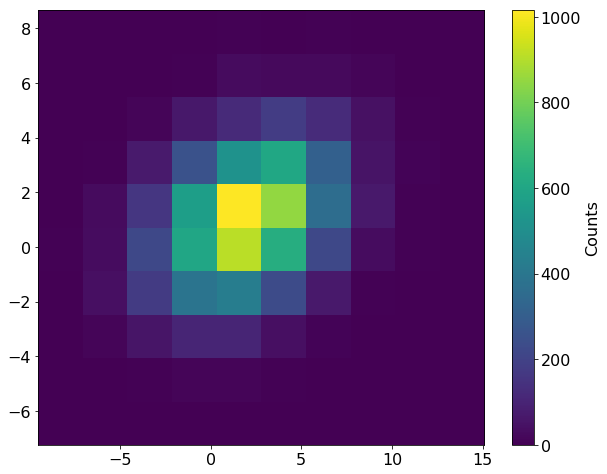

In [82]:
mean = [2, 1]
cov = [[9, 2],
       [2, 4]]

x, y = np.random.multivariate_normal(mean, cov, size=10000).T

plt.hist2d(x, y)
# plt.hist2d(x, y, bins=50)
# plt.hist2d(x, y, bins=[25, 50], range=[[-10, 14], [-5, 7]])

plt.colorbar(label='Counts');

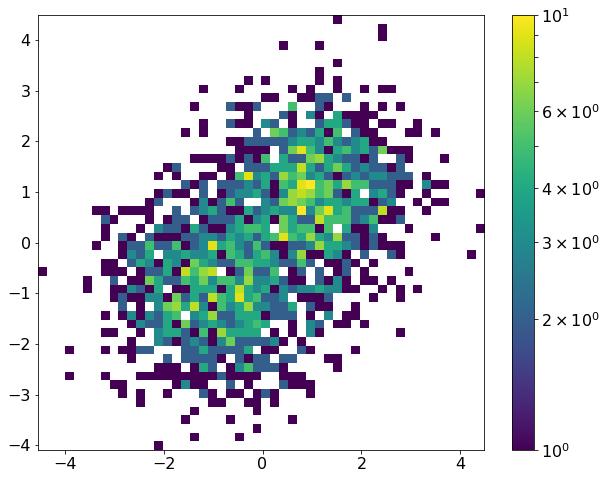

In [65]:
from matplotlib.colors import LogNorm

plt.hist2d(x, y, bins=50, norm=LogNorm())

plt.colorbar();

<a id="scatter"></a>
# Scatter Plots

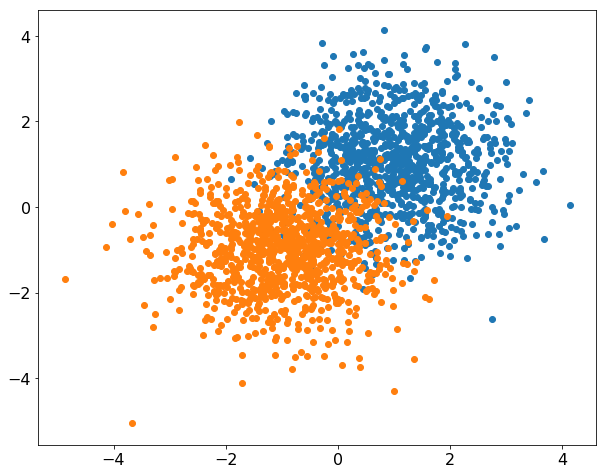

In [66]:
x1, y1 = np.random.multivariate_normal([1, 1], [[1, 0], [0, 1]], 1000).T
x2, y2 = np.random.multivariate_normal([-1, -1], [[1, 0], [0, 1]], 1000).T


plt.scatter(x1, y1)
plt.scatter(x2, y2);

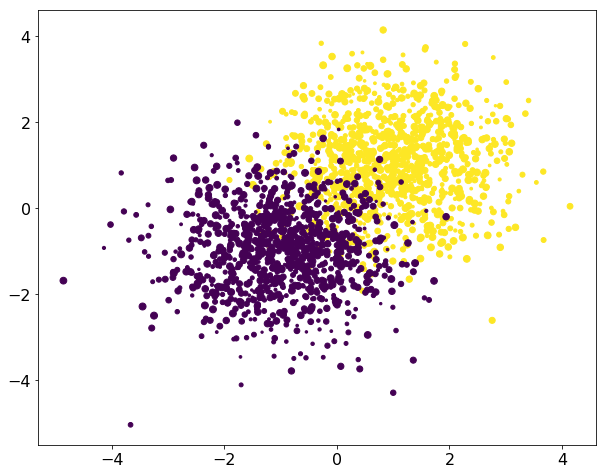

In [67]:
x = np.append(x1, x2)
y = np.append(y1, y2)
s = np.random.uniform(5, 50, 2000)
label = np.append(np.ones_like(x1), np.zeros_like(x2))

plt.scatter(x, y, c=label, s=s);

<a id=oo_syntax></a>
# Using the object orientated syntax

Matplotlib has two APIs (yes, it's strange).

* The matlab-like syntax we used until now:
    * Easier to write
    * Familiar for matlab users
    * Frequently uses global states
* Object-oriented syntax:
    * More powerful
    * More control over the plots
    * Preferable for library code
    * No (or at least very few) global states

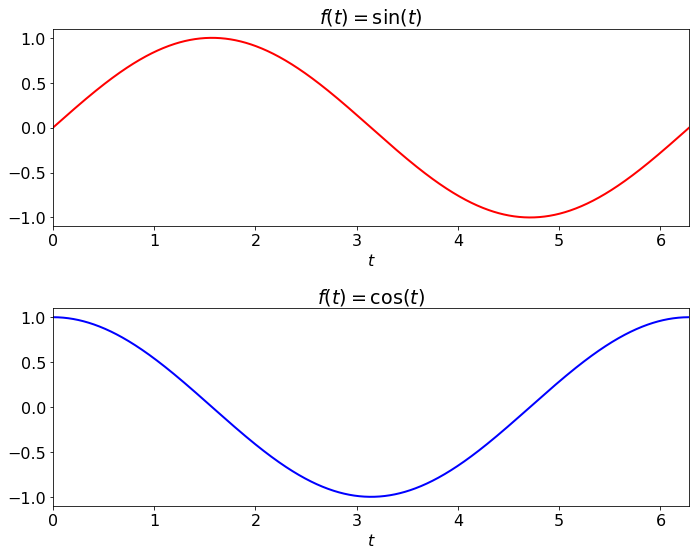

In [64]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 2*np.pi, 1000)

fig, (ax1, ax2) = plt.subplots(2, 1)

# note that plot is now a method of ax1, not the global plt object
ax1.plot(t, np.sin(t), 'r-')
ax1.set_title(r"$f(t)=\sin(t)$")   # use object-oriented get/set syntax
ax1.set_xlabel("$t$")
ax1.set_xlim(0, 2*np.pi)
ax1.set_ylim(-1.1, 1.1)

ax2.plot(t, np.cos(t), 'b-')
ax2.set_title(r"$f(t)=\cos(t)$")
ax2.set_xlabel("$t$")
ax2.set_xlim(0, 2*np.pi)
ax2.set_ylim(-1.1, 1.1)

fig.tight_layout()

<a id=publication_plots></a>
## Plots for Publication

* Same font and font sizes as in your publication
* Really high quality, publication ready plots

<a id=plot_styles></a>
## Plot styles

List available styles:

In [7]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


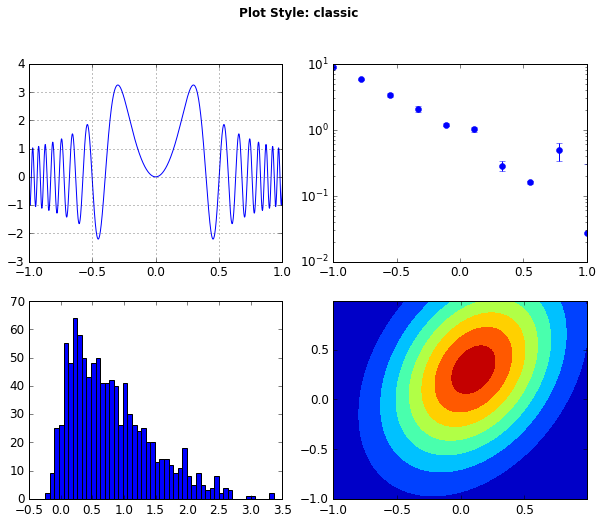

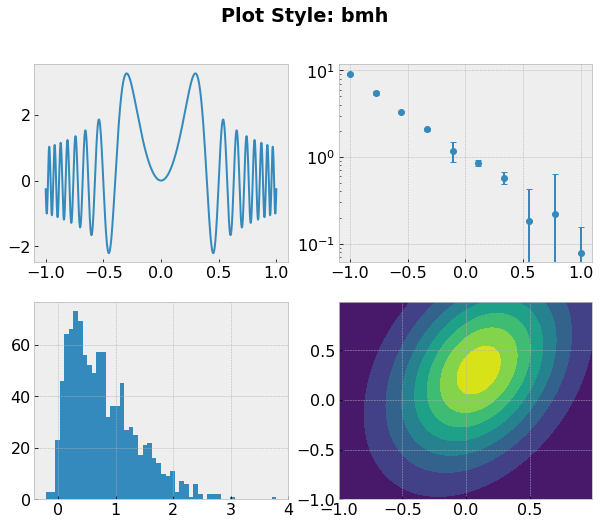

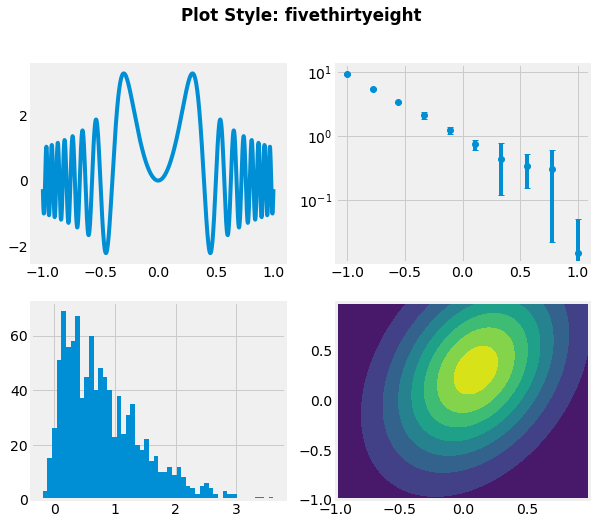

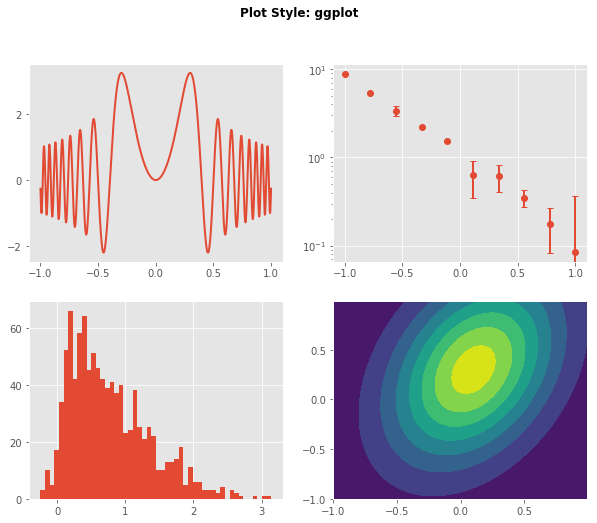

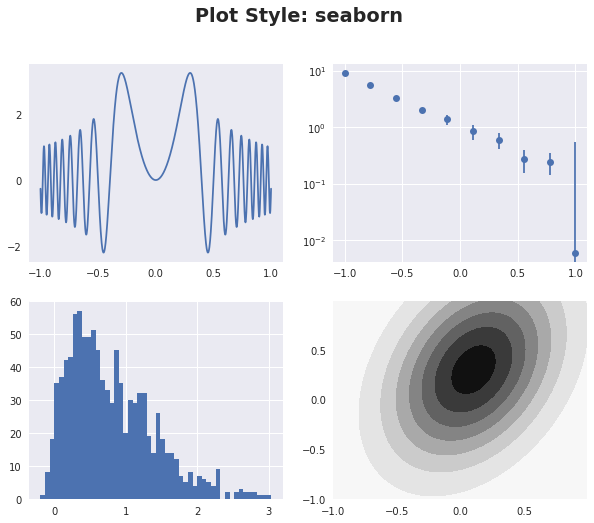

In [8]:
from scipy import stats

def plot_stuff():
    plt.subplot(2, 2, 1)
    x = np.linspace(-1, 1, 1000)
    plt.plot(x, np.sin(50*x**3)/(x))
    plt.grid()

    plt.subplot(2, 2, 2)
    x = np.linspace(-1, 1, 10)
    y = np.exp(-2.2*x) + np.random.normal(0, 0.1, 10)
    yerr = np.random.normal(0, 0.2, 10)
    plt.errorbar(x, y, yerr, fmt='o', capsize=3)
    plt.yscale('log')

    plt.subplot(2, 2, 3)
    x = stats.skewnorm.rvs(10, size=1000)
    plt.hist(x, bins=50)

    plt.subplot(2, 2, 4)
    x, y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.dstack((x, y))
    z = stats.multivariate_normal([0.1, 0.3], [[0.2, 0.3], [0.1, 0.4]])
    plt.contourf(x, y, z.pdf(pos))

for plot_style in ['classic', 'bmh', 'fivethirtyeight', 'ggplot', 'seaborn']:
    plt.figure()
    with plt.style.context(plot_style):   # use context manager so that changes are temporary
        plot_stuff()
        plt.suptitle('Plot Style: ' + plot_style, fontweight='bold')

<a id=save_figures></a>
## Saving figures

Use `plt.savefig` to save your figure to the current working directory.

Not sure what the current working directory is?

In [ ]:
pwd()

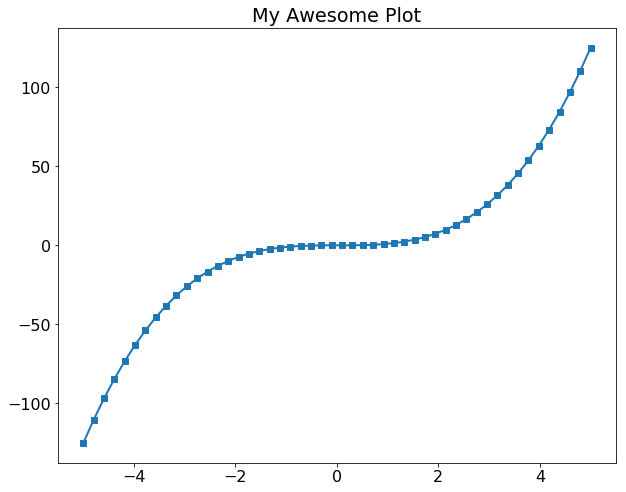

In [22]:
x = np.linspace(-5, 5)
plt.plot(x, x**3, marker='s')
plt.title("My Awesome Plot")

# only call *one* of these; figure is closed after saving
plt.savefig('awesome_plot.pdf')
# plt.savefig('awesome_plot.eps')
# plt.savefig('awesome_plot.png')   # bitmap graphics; don't use me for publications!
# plt.savefig('awesome_plot.jpg')   # bitmap graphics; don't use me either!